# Examen B Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_MoralesGabriel*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`,`B`) o (`Esc`,`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

---
# Primer punto. Optimización de funciones con `SymPy` (34 puntos)

**Costo mínimo**. Imagine un contenedor rectangular sin tapa que debe satisfacer las siguientes condiciones:

- Este contenedor debe tener un volumen **V**.
- La longitud de su base es el doble que el de su ancho.
- El material para la base cuesta 12.00 MXN por cada $m^2$.
- El material para los lados cuesta 6.00 MXN por cada $m^2$.

¿Cuál es el costo del contenedor más barato?


## - CORRECCIÓN -
No supe plantear el problema así que me lo brinque y no supe organizar mi tiempo, cuando regresé al problema ya era demasiado tarde que no lo pude hacer. Al querer plantear la función me revolví mucho.

Al corregirlo me tomé mi tiempo y corregí el planteamiento de mi función de costo, para despúes seguir con el procedimiento del problema.

Puede haber manejado mejor mi tiempo, y pensar antes de estresarme. Confiar en lo que se y que lo puedo hacer.

1. Definir criterio de optimización
   - Minimizar
2. Variables que afectan la función de costo
   - $b = 2x^2$, 
   - $l = 4xh + 2xh = 6xh $
3. Función de costo
   - $C(x, h) = 24x^2 + 36xh$
4. Información adicional

    base = $12 cada $m^2$$
    lados = $6 cada $m^2$$


1. Escriba el costo **C** del contenedor como una función del ancho de la base $x$ y de su altura $h$. Realice este punto usando $\LaTeX$ y celdas *Markdown*.

2. Determina las dimensiones del contenedor si el volumen debe ser de $12m^3$.

In [37]:
import numpy as np
import sympy as sp 

sp.var("x")
sp.var("h")


h

In [38]:
volumen = 2*x**2*h-12
volumen

2*h*x**2 - 12

In [52]:
costo = 24*x**2 + 36*x*h
costo

36*h*x + 24*x**2

In [53]:
# Despeje de una variable
d_x = sp.solve(volumen, x)
d_x

[-sqrt(6)*sqrt(1/h), sqrt(6)*sqrt(1/h)]

In [54]:
# Separamos el valor positivo
val_x = d_x[1]
val_x

sqrt(6)*sqrt(1/h)

In [55]:
# Substituir en la función de costo
subs = costo.subs(x, val_x)
subs

36*sqrt(6)*h*sqrt(1/h) + 144/h

In [56]:
# Derivar
df = sp.diff(subs, h)
df

18*sqrt(6)*sqrt(1/h) - 144/h**2

In [57]:
# resolver para valor de h
pc = sp.solve(df, h)
pc

[2*6**(2/3)/3]

In [58]:
# Valor de h
float(pc[0])

2.201284832596418

In [59]:
# Valor de x
xnum = float(val_x.subs(h, pc[0]))
xnum

1.6509636244473134

### RESPUESTA 
Los valores que satisfacen las dimesiones del volumen de la caja son de:

x = 1.65 m

h = 2.20 m

#### Siendo el volumen de la caja..

alto = 2.20m -> h

ancho = 1.65m -> x

largo = 4.4m -> h*2

3. ¿Cuál fue el costo de fabricar este contenedor?

In [60]:
# Sustituir los valores de x y h en fun COSTO
costo_fin = float(costo.subs(x, xnum).subs(h, pc[0]))
costo_fin

196.24902402587108

### RESPUESTA
El costo mínimo de fabricación del contenedor es de $196.25

---
# Segundo punto. Programación lineal (33 puntos)

## - CORRECCIÓN -
No supe plantear las variables y las iguale, cuando así no era. Tambien se me olvidó cambiar los signos al ser nuestro criterio de optimización MINIMIZAR. 

Corregí los signos y mis matrices, para que cumplieran con las reestricciones del problema. Agregar la celda de Markdown para explicar la respuesta.

Puedo evitar est error prestando más atención a lo que me dice el problema, sin antes adelantarme a hacerlo como por "receta" igual otros anteriores. Cada problema es diferente por lo mismo se soluciona de diferente manera.

Una empresa se dedica a fabricar tarjetas de control para automóviles, y están en su momento de planeación de compras anuales. Hay 5 proveedores que pueden proveer los componentes, cada uno a su propio precio.

<table>
  <tr>
      <th>  </th>
      <th>Proveedor 1</th>
      <th>Proveedor 2</th>
      <th>Proveedor 3</th>
      <th>Demanda</th>
  </tr>
  <tr>
      <th>Componente 1</th>
      <td>0.5</td>
      <td>0.6</td>
      <td>0.7</td>
      <td>15000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Componente 2</th>
      <td>0.7</td>
      <td>0.5</td>
      <td>0.6</td>
      <td>20000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Componente 3</th>
      <td>0.32</td>
      <td>0.54</td>
      <td>0.8</td>
      <td>12000</td>
  </tr>

  <tr style="border-bottom: 1px solid #000;">
      <th>Capacidad</th>
      <td> 21000 </td>
      <td> 16000 </td>
      <td> 16000 </td>
      <td>  </td>
  </tr>
</table>

El proveedor tiene restricciones de capacidad de fabricación del tipo de componentes, por lo que un proveedor no puede satisfacer nuestra demanda completa para cada componente.

Se desea conocer la cantidad que se debe comprar de cada componente a cada proveedor para gastar la menor cantidad de dinero posible, pero al mismo tiempo lograr satisfacer la demanda para poder continuar con la manufactura del producto.

1. Escriba la función a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(23 puntos)}
\end{equation}

1. Definir criterio de optimización
   - Minimizar
2. Variables que afectan la función de costo
   - $c1p1$, $c1p2$, $c1p3$, $c2p1$, $c2p2$, $c2p3$, $c3p1$, $c3p2$, $c3p3$, 
3. Función de costo
   - $$\min_{x_1,\dots,x_9}0.5x_{c1p1} + 0.6x_{c1p2} + 0.7x_{c1p3} + 0.7x_{c2p1} + 0.5x_{c2p2} + 0.6x_{c2p3} + 0.32x_{c3p1} + 0.54x_{c3p2} + 0.8x_{c3p3}$$
4. Información adicional
   - 0.5 c1p1 + 0.7 c2p1 + 0.32 c3p1 ≤ 21000
   - 0.6 c1p2 + 0.5 c2p2 + 0.54 c3p2 ≤ 16000
   - 0.7 c1p3 + 0.6 c2p3 + 0.8  c3p3 ≤ 16000
   - c1p1 + c1p2 + c1p3  ≥  15000
   - c2p1 + c2p2 + c2p3  ≥  20000
   - c3p1 + c3p2 + c3p3  ≥  12000

2. Resuelva el problema utilizando la función `linprog`. ¿Cómo debe ser la distribución de compras? ¿Cuánto dinero se necesita para satisfacer la demanda? (10 puntos)

In [29]:
import scipy.optimize as opt
import numpy as np

c = np.array([0.5,
              0.7,
              0.32,
              0.6,
              0.5,
              0.54,
              0.7,
              0.6,
              0.8
             ])

Aub = np.array([
    [-1, 0, 0, -1, 0, 0, -1, 0, 0],
    [0, -1, 0, 0, -1, 0, 0, -1, 0],
    [0, 0, -1, 0, 0, -1, 0, 0, -1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1]
])

bub = np.array([-15000,
                -20000,
                -12000,
                 21000,
                 16000,
                 16000
               ])



In [31]:
opt.linprog(c, Aub, bub)

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: 22940.0
       ineqlin:  marginals: array([-0.7 , -0.6 , -0.52, -0.2 , -0.1 , -0.  ])
  residual: array([   0.,    0.,    0.,    0.,    0., 6000.])
         lower:  marginals: array([0.  , 0.3 , 0.  , 0.  , 0.  , 0.12, 0.  , 0.  , 0.28])
  residual: array([ 9000.,     0., 12000.,     0., 16000.,     0.,  6000.,  4000.,
           0.])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 6
         slack: array([   0.,    0.,    0.,    0.,    0., 6000.])
        status: 0
       success: True
         upper:  marginals: array([0., 0., 0., 0., 0., 0., 0., 0., 0.])
  residual: array([inf, inf, inf, inf, inf, inf, inf, inf, inf])
             x: array([ 9000.,     0., 12000.,     0., 16000.,     0.,  6000.,  4000.,
           0.])

### RESPUESTA

Los componentes se deberián de repartir de la sig. manera:

9,000 COMP 1 al PROVEEDOR 1

12,000 COMP 3 al PROVEEDOR 1

16,000 COMP 2 al PROVEEDOR 2

6,000 COMP 1 al PROVEEDOR 3

4,000 COMP 2 al PROVEEDOR 3


### Para satisfacer la demanda se necesitan $22,940

- 9,000x1 + 12,000x3 +16,000x5 +6,000x7+ 4,000x8

In [32]:
demanda = (9000*0.5)+ (12000*0.32)+ (16000*0.5) + (6000*0.7) + (4000*0.6)
demanda

22940.0

# Tercer punto. Ajuste de curvas (33 puntos)

Utiliza el archivo adjunto en Canvas en el apartado que corresponde al examen.

## - Corrección -
Me falto tiempo y no sabía como sustituir el valor de x para sacar el valor de y.

Termine el ejercicio y agregue la celda de Markdown con  el resultado.

Administrar mejor mi tiempo para poder terminar los ejercicios y no olvidar agregar la celda de Markdown para la próxima vez.

Escribe tu número de expediente:  **741902**

Lee el archivo y extrae la siguiente información:
- $x$ es la primer columna del archivo
- $y$ es la columna correspondiente a los últimos dos dígitos de tu número de expediente + 1. E.g. mi expediente es $693871$; por lo tanto, debo usar la columna $72$.

In [2]:
import pandas as pd 

data = pd.read_excel("E01-RegresionLineal.xlsx")
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.000000,4.983091,3.769339,5.594828,6.429803,4.511528,6.706383,2.911751,-2.864652,-3.093433,...,6.667738,5.885562,-2.052453,-2.984045,5.750429,2.135754,-1.234049,3.500585,3.206284,-2.015092
1,0.002002,3.614394,2.396633,4.225133,5.058559,3.141485,5.346220,1.538843,-4.236502,-4.464649,...,5.312463,4.525002,-3.410375,-4.346935,4.396159,0.773647,-2.607035,2.130640,1.840478,-3.376963
2,0.004004,4.188195,2.966396,4.797931,5.629813,3.713902,5.928572,2.108423,-3.665847,-3.893386,...,5.899704,5.106895,-2.825807,-3.767381,4.984377,1.354042,-2.037531,2.703165,2.417138,-2.796368
3,0.006006,5.445592,4.219727,6.054320,6.884664,4.969878,7.194535,3.361588,-2.411586,-2.638543,...,7.170558,6.372337,-1.557653,-2.504284,6.256181,2.618039,-0.784438,3.959257,3.677362,-1.532206
4,0.008008,5.067521,3.837561,5.675236,6.504048,4.590350,6.825046,2.979275,-2.792786,-3.019186,...,6.805961,6.002265,-1.924977,-2.876709,5.892506,2.246572,-1.166821,3.579851,3.302087,-1.903542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.991992,-37.621743,-26.216957,2.179613,34.525805,-81.587062,44.262737,22.788572,58.082286,-69.526880,...,-57.907315,-30.282534,2.509291,-114.436776,14.101042,109.678623,11.649459,0.666863,27.882475,93.843512
996,1.993994,-38.413531,-26.940495,1.526510,34.067619,-82.481098,43.789529,22.302350,57.727557,-70.383159,...,-58.823098,-31.021199,1.898045,-115.441524,13.503160,109.438779,11.124500,0.086051,27.430621,93.598580
997,1.995996,-38.302053,-26.760562,1.777022,34.513839,-82.472001,44.220604,22.720442,58.277463,-70.336305,...,-58.835998,-30.856352,2.190637,-115.543472,13.809172,110.103751,11.503708,0.409258,27.883253,94.258542
998,1.997998,-39.725567,-28.115414,0.492894,33.426211,-83.998028,43.117706,21.604596,57.293749,-71.824574,...,-60.384272,-32.226251,0.948811,-117.180880,12.580823,109.235287,10.348831,-0.801770,26.802116,93.385145


In [3]:
data.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             91,  92,  93,  94,  95,  96,  97,  98,  99, 100],
           dtype='int64', length=101)

In [4]:
x = data[0].values
x

array([0.        , 0.002002  , 0.004004  , 0.00600601, 0.00800801,
       0.01001001, 0.01201201, 0.01401401, 0.01601602, 0.01801802,
       0.02002002, 0.02202202, 0.02402402, 0.02602603, 0.02802803,
       0.03003003, 0.03203203, 0.03403403, 0.03603604, 0.03803804,
       0.04004004, 0.04204204, 0.04404404, 0.04604605, 0.04804805,
       0.05005005, 0.05205205, 0.05405405, 0.05605606, 0.05805806,
       0.06006006, 0.06206206, 0.06406406, 0.06606607, 0.06806807,
       0.07007007, 0.07207207, 0.07407407, 0.07607608, 0.07807808,
       0.08008008, 0.08208208, 0.08408408, 0.08608609, 0.08808809,
       0.09009009, 0.09209209, 0.09409409, 0.0960961 , 0.0980981 ,
       0.1001001 , 0.1021021 , 0.1041041 , 0.10610611, 0.10810811,
       0.11011011, 0.11211211, 0.11411411, 0.11611612, 0.11811812,
       0.12012012, 0.12212212, 0.12412412, 0.12612613, 0.12812813,
       0.13013013, 0.13213213, 0.13413413, 0.13613614, 0.13813814,
       0.14014014, 0.14214214, 0.14414414, 0.14614615, 0.14814

In [5]:
y = data[3].values
y

array([5.59482832, 4.22513304, 4.79793071, 6.05432007, 5.67523647,
       2.82466986, 4.74632327, 3.63918282, 3.68164462, 4.18980388,
       3.9176095 , 5.22221886, 4.52338155, 3.87843656, 4.19506194,
       4.07932983, 5.23421121, 3.52947053, 4.04221336, 2.86958719,
       1.16525098, 4.36643803, 4.57185525, 2.9598748 , 5.96643655,
       2.23697988, 3.73178942, 3.49355428, 5.20824664, 5.13957775,
       3.8199404 , 4.03795209, 2.7668232 , 1.66865483, 3.29640464,
       3.79555457, 4.86440858, 4.83143371, 3.23668684, 3.31669471,
       2.56545248, 2.18901983, 1.89782442, 5.54995153, 3.08463033,
       3.15133959, 2.3317751 , 4.35724272, 1.96106193, 3.35745258,
       2.6699852 , 3.94763916, 3.04524256, 2.37075286, 3.51856662,
       3.97047114, 3.60407369, 3.83547249, 2.8941497 , 3.16122906,
       2.84703559, 3.15549623, 2.69748415, 1.77995669, 3.67930229,
       3.09576018, 1.86303602, 3.95173828, 2.57740789, 3.53243057,
       4.20538351, 3.60111262, 4.60739628, 2.22906493, 3.86215

1. Ajuste los datos con polinomios de grados 1, 3, y 5. Muestre los errores de forma gráfica. ¿Qué polinomio se ajusta mejor?

In [6]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline


m = len(y)
ones = np.ones([m, 1])
x1 = np.reshape(x, [m, 1])
x2 = np.reshape(x**2, [m, 1])
x3 = np.reshape(x**3, [m, 1])
x4 = np.reshape(x**4, [m, 1])
x5 = np.reshape(x**5, [m, 1])

X1 = np.hstack((ones, x1))
X2 = np.hstack((ones, x1, x2))
X3 = np.hstack((ones, x1, x2, x3))
X4 = np.hstack((ones, x1, x2, x3, x4))
X5 = np.hstack((ones, x1, x2, x3, x4, x5))

beta_inicial1 = np.random.rand(2)
beta_inicial3 = np.random.rand(4)
beta_inicial5 = np.random.rand(6)

y_vector = np.reshape(y, [m, 1])

def foo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    prediccion = X @ beta
    error = prediccion - y
    return (error.T @ error)[0][0]


In [7]:
sol1 = opt.minimize(foo, beta_inicial1, args=(X1, y_vector))
sol3 = opt.minimize(foo, beta_inicial3, args=(X3, y_vector))
sol5 = opt.minimize(foo, beta_inicial5, args=(X5, y_vector))


In [8]:
sol1

      fun: 1869.665427604856
 hess_inv: array([[ 6.66338404e-04, -3.55066732e-09],
       [-3.55066732e-09,  2.66300049e-09]])
      jac: array([1.52587891e-05, 1.52587891e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 63
      nit: 5
     njev: 21
   status: 2
  success: False
        x: array([3.36575037, 1.06717005])

In [9]:
sol3

      fun: 991.0960482559841
 hess_inv: array([[ 0.00924048, -0.03797652,  0.03933109, -0.01166991],
       [-0.03797652,  0.19933592, -0.22680201,  0.07082492],
       [ 0.03933109, -0.22680201,  0.27066599, -0.08708987],
       [-0.01166991,  0.07082492, -0.08708987,  0.02861346]])
      jac: array([7.62939453e-06, 7.62939453e-06, 7.62939453e-06, 7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 80
      nit: 11
     njev: 16
   status: 0
  success: True
        x: array([ 4.54217678, -8.99920794, 14.82699032, -5.43918707])

In [10]:
sol5

      fun: 964.216161972722
 hess_inv: array([[ 1.52654883e-03,  1.83750247e-04, -2.14368631e-03,
        -4.96163741e-04,  8.70822760e-04, -8.80395995e-05],
       [ 1.83750247e-04,  2.39177334e-03, -4.07643568e-03,
         1.17759478e-03,  1.82470304e-03, -9.24006090e-04],
       [-2.14368631e-03, -4.07643568e-03,  1.93454128e-02,
        -6.24813053e-03, -8.49617969e-03,  3.90281601e-03],
       [-4.96163741e-04,  1.17759478e-03, -6.24813053e-03,
         3.57632661e-03,  2.76090136e-03, -1.65781486e-03],
       [ 8.70822760e-04,  1.82470304e-03, -8.49617969e-03,
         2.76090136e-03,  3.80813457e-03, -1.76143399e-03],
       [-8.80395995e-05, -9.24006090e-04,  3.90281601e-03,
        -1.65781486e-03, -1.76143399e-03,  9.29581932e-04]])
      jac: array([1.52587891e-05, 3.81469727e-05, 6.86645508e-05, 1.06811523e-04,
       1.75476074e-04, 3.28063965e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 245
      nit: 21
     njev: 35
   sta

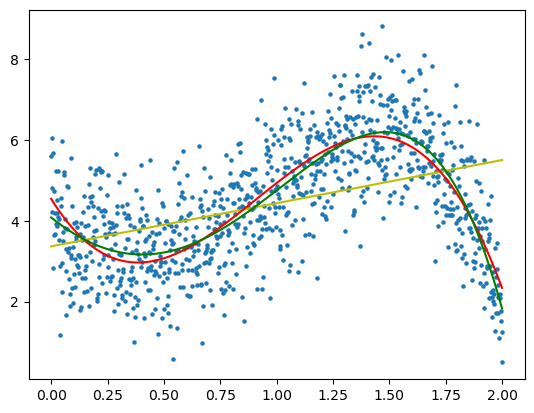

In [11]:
plt.figure()
plt.scatter(x, y, 5)
plt.plot(x, X1 @ sol1.x, "y")
plt.plot(x, X3 @ sol3.x, "r")
plt.plot(x, X5 @ sol5.x, "g")


<BarContainer object of 3 artists>

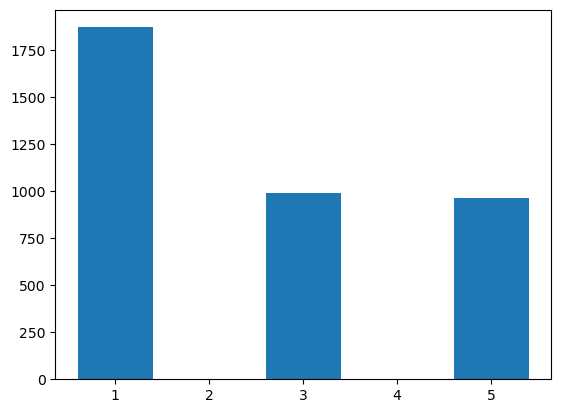

In [12]:
plt.figure()
plt.bar([1, 3, 5], [sol1.fun, sol3.fun, sol5.fun])


## El polinomio que mejor se ajusta es el de grado 5, pues su grado de error es menor.

2. Muestre en un gráfico los datos y el polinomio que mejor se ajuste.

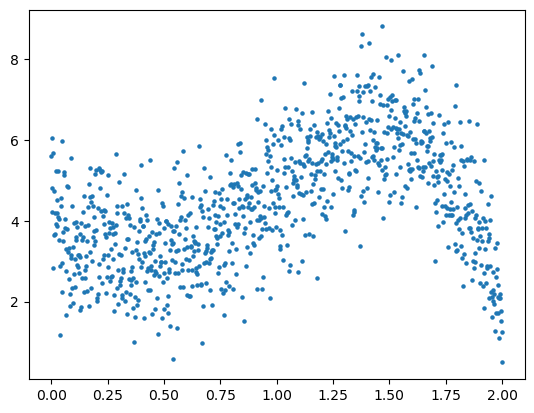

In [13]:
# Gráfico de los datos
plt.figure()
plt.scatter(x, y, 5)

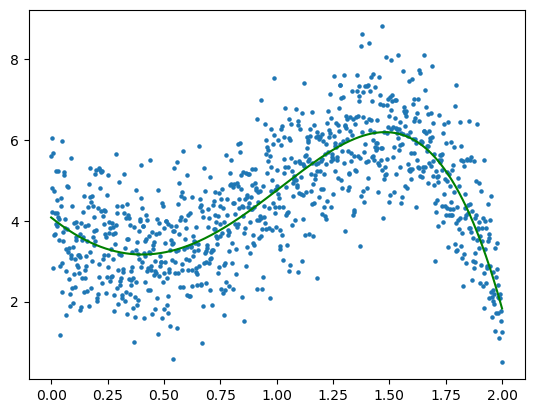

In [14]:
# Polinomio grado 5 
plt.figure()
plt.scatter(x, y, 5)
plt.plot(x, X5 @ sol5.x, "g")

(array([ 14.,  37.,  83., 157., 230., 217., 149.,  81.,  23.,   9.]),
 array([-2.82198362, -2.24909154, -1.67619945, -1.10330737, -0.53041528,
         0.04247681,  0.61536889,  1.18826098,  1.76115306,  2.33404515,
         2.90693723]),
 <BarContainer object of 10 artists>)

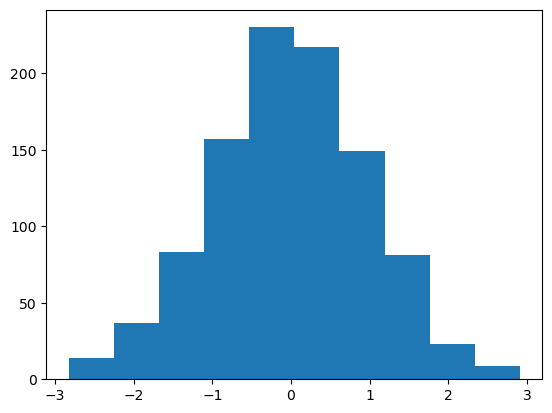

In [15]:
plt.figure()
plt.hist((X5 @ sol5.x) - y)

3. Use el modelo para averiguar el valor de $y$ cuando:
- $x=0.001$
- $x=-0.1$
- $x=2.1$

In [25]:
def f(x) :
    return 1.52654883e-03 + 1.83750247e-04*x -2.14368631e-03*x**2 -4.96163741e-04*x**3 + 8.70822760e-04*x**4 -8.80395995e-05*x**5
    

In [26]:
f(0.001)

0.001526730436065397

In [27]:
f(-0.1)

0.0014873210686129948

In [28]:
f(2.1)

0.0012040172713795056

4. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación?

La interpolación es para conocer puntos DENTRO de los datos de muestra; suele ser menos atinada cuándo  es un gran conjunto de datos.

La extrapolación es para conocer puntos FUERA de los datos de muestra; es más atinada, pues piensa en un estimadao a largo plazo.

5. (Punto extra) Agregue un termino $\beta_5 cos(10x)$ a su modelo y grafique los resultados. ¿Mejoró el resultado?